##### Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/coracao.csv")

##### Análise Inicial

In [3]:
df.head()

,Idade,Sexo,TipoDorPeito,PressaoArterialRepouso,Colesterol,GlicoseJejum,EletrocardiogramaRepouso,FreqCardiacaMaxima,AnginaExercicio,DepressaoSTExercicioRepouso,InclinacaoST,DoencaCardiaca
0,40,M,ATA,140,289,Normal,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,Normal,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        746 non-null    int64  
 1   Sexo                         746 non-null    object 
 2   TipoDorPeito                 746 non-null    object 
 3   PressaoArterialRepouso       746 non-null    int64  
 4   Colesterol                   746 non-null    int64  
 5   GlicoseJejum                 746 non-null    object 
 6   EletrocardiogramaRepouso     746 non-null    object 
 7   FreqCardiacaMaxima           746 non-null    int64  
 8   AnginaExercicio              746 non-null    object 
 9   DepressaoSTExercicioRepouso  746 non-null    float64
 10  InclinacaoST                 746 non-null    object 
 11  DoencaCardiaca               746 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 70.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
PressaoArterialRepouso,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Colesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FreqCardiacaMaxima,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
DepressaoSTExercicioRepouso,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
DoencaCardiaca,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


##### EDA (Colunas)

In [6]:
colunas_numericas = [col for col in df if df[col].dtype in ['int64', 'float64']] 
colunas_categoricas = [col for col in df if df[col].dtype in ['object']] 

In [7]:
colunas_categoricas

['Sexo',
 'TipoDorPeito',
 'GlicoseJejum',
 'EletrocardiogramaRepouso',
 'AnginaExercicio',
 'InclinacaoST']

In [8]:
colunas_numericas

['Idade',
 'PressaoArterialRepouso',
 'Colesterol',
 'FreqCardiacaMaxima',
 'DepressaoSTExercicioRepouso',
 'DoencaCardiaca']

##### Correlações

In [9]:
df_enc = pd.read_csv("data/coracao_codificado.csv")

In [10]:
sns.set_style('darkgrid')

In [11]:
corr_matrix = df_enc.corr()
corr_matrix

,Idade,Sexo,TipoDorPeito,PressaoArterialRepouso,Colesterol,GlicoseJejum,EletrocardiogramaRepouso,FreqCardiacaMaxima,AnginaExercicio,DepressaoSTExercicioRepouso,InclinacaoST,DoencaCardiaca
Idade,1.000000,0.040917,-0.083120,0.259865,0.058758,0.241338,-0.055419,-0.382112,0.245908,0.286006,-0.285421,0.298617
Sexo,0.040917,1.000000,-0.120709,0.034363,-0.107045,0.096075,0.042296,-0.157002,0.192579,0.125743,-0.142808,0.292779
TipoDorPeito,-0.083120,-0.120709,1.000000,-0.034066,-0.102644,-0.000226,-0.046851,0.303938,-0.394822,-0.219761,0.238469,-0.395776
PressaoArterialRepouso,0.259865,0.034363,-0.034066,1.000000,0.095939,0.173765,0.035661,-0.125774,0.161035,0.198575,-0.143881,0.173242
Colesterol,0.058758,-0.107045,-0.102644,0.095939,1.000000,0.054012,-0.070544,-0.019856,0.086768,0.058488,-0.078516,0.103866
GlicoseJejum,0.241338,0.096075,-0.000226,0.173765,0.054012,1.000000,0.031518,-0.102710,0.109995,0.055568,-0.157780,0.160594
EletrocardiogramaRepouso,-0.055419,0.042296,-0.046851,0.035661,-0.070544,0.031518,1.000000,-0.158797,0.085602,-0.027555,0.017472,0.009935
FreqCardiacaMaxima,-0.382112,-0.157002,0.303938,-0.125774,-0.019856,-0.102710,-0.158797,1.000000,-0.396289,-0.259533,0.349926,-0.377212
AnginaExercicio,0.245908,0.192579,-0.394822,0.161035,0.086768,0.109995,0.085602,-0.396289,1.000000,0.465491,-0.473543,0.551834
DepressaoSTExercicioRepouso,0.286006,0.125743,-0.219761,0.198575,0.058488,0.055568,-0.027555,-0.259533,0.465491,1.000000,-0.613961,0.495696


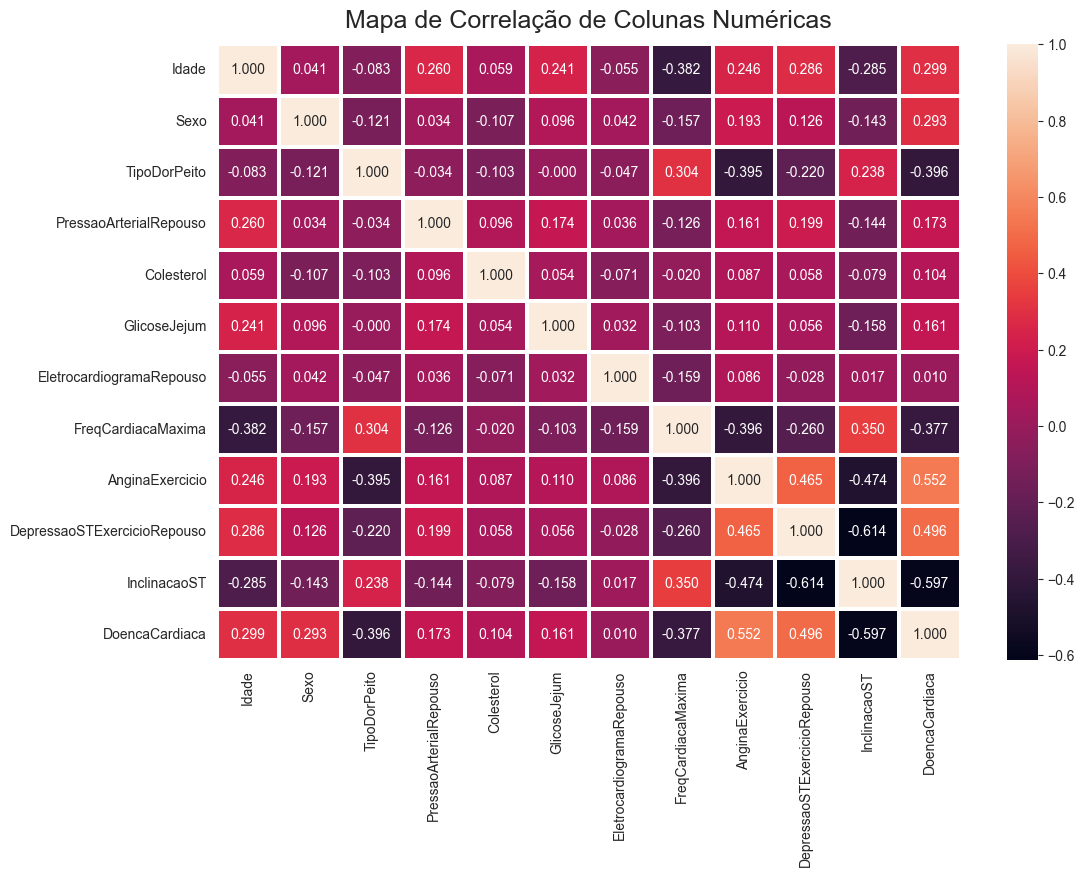

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', linewidths=1.5)
plt.title('Mapa de Correlação de Colunas Numéricas', fontdict={'fontsize': 18}, pad=12)
plt.show()

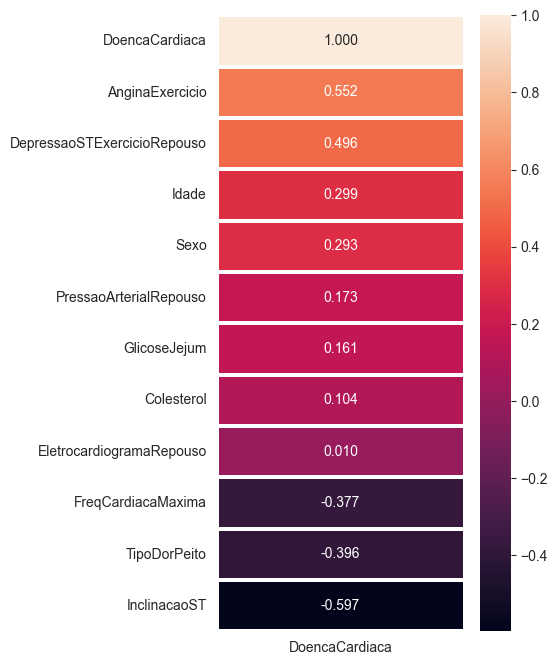

In [13]:
plt.figure(figsize=(4, 8))
sns.heatmap(corr_matrix[['DoencaCardiaca']].sort_values(by='DoencaCardiaca', ascending=False), annot=True, fmt='.3f', linewidths=1.5)
plt.show()

In [14]:
colunas_barra = ['Sexo', 'TipoDorPeito', 'EletrocardiogramaRepouso', 'AnginaExercicio', 'InclinacaoST', 'GlicoseJejum']
colunas_hist = ['Idade', 'PressaoArterialRepouso', 'Colesterol', 'FreqCardiacaMaxima', 'DepressaoSTExercicioRepouso']

##### Comparações com a Variável Alvo

In [15]:
df_sem = df[df['DoencaCardiaca'] == 0]
df_com = df[df['DoencaCardiaca'] == 1]

In [16]:
def grafico_categorica(coluna):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    sns.countplot(x=coluna, data=df_sem, ax=axs[0], palette="rocket", hue=coluna)
    axs[0].set_title('Sem Doença Cardíaca')
    for bar in axs[0].patches:
        height = bar.get_height()
        axs[0].text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=11,
        )

    sns.countplot(x=coluna, data=df_com, ax=axs[1], palette="rocket", hue=coluna)
    axs[1].set_title('Com Doença Cardíaca')
    for bar in axs[1].patches:
        height = bar.get_height()
        axs[1].text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=11,
        )

    plt.ylabel('Contagem')
    plt.show()

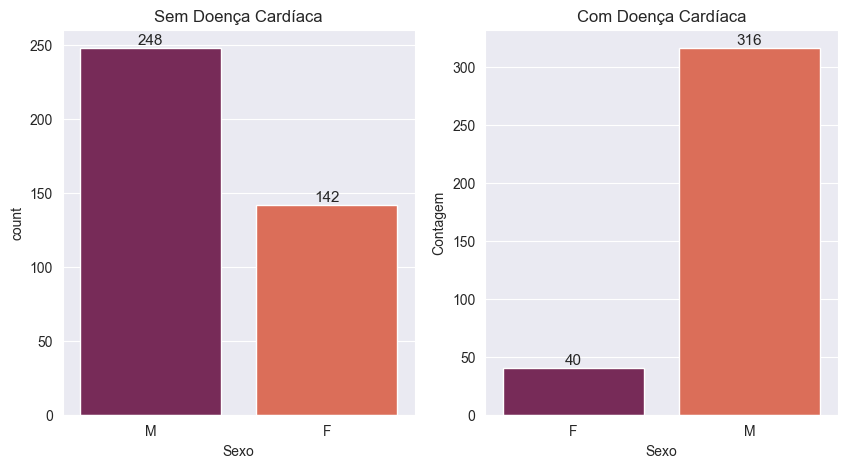

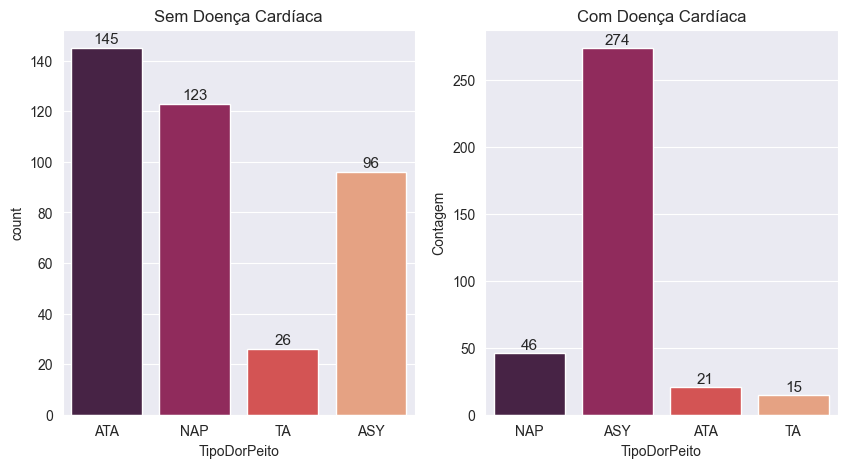

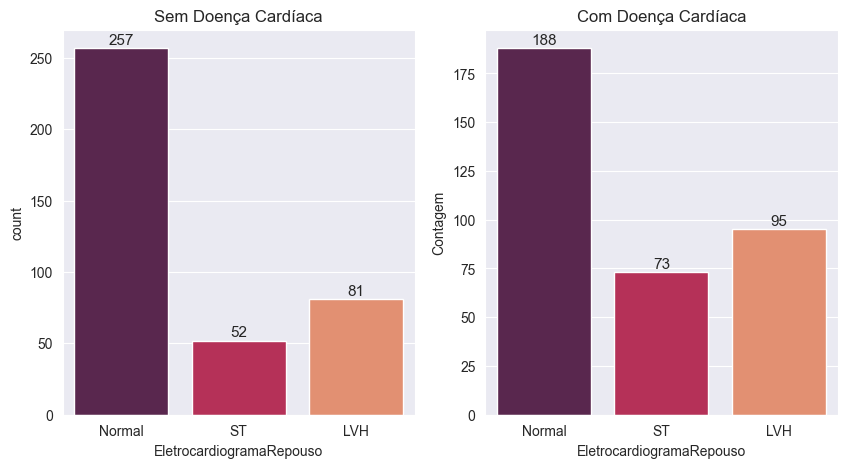

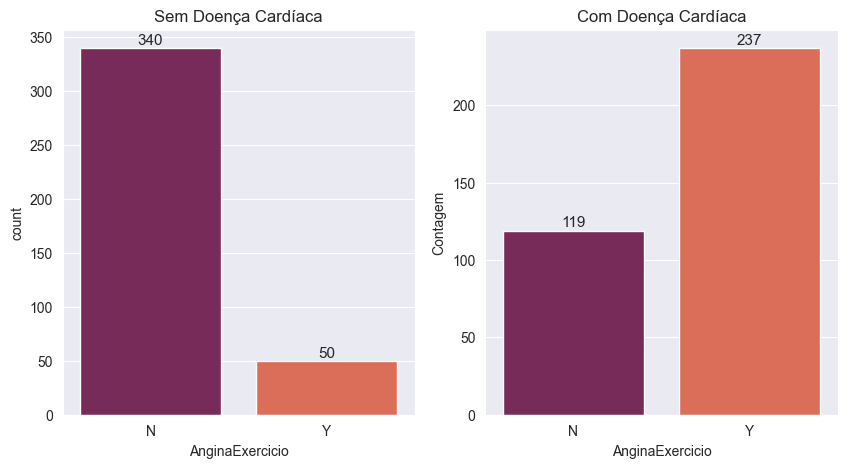

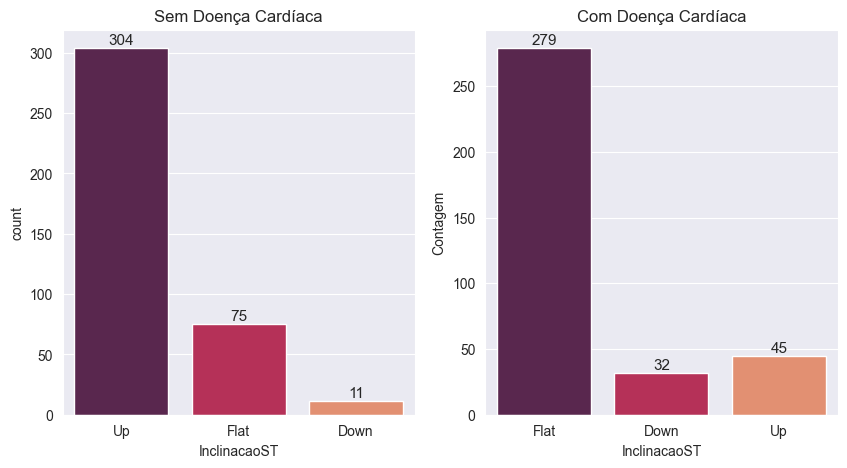

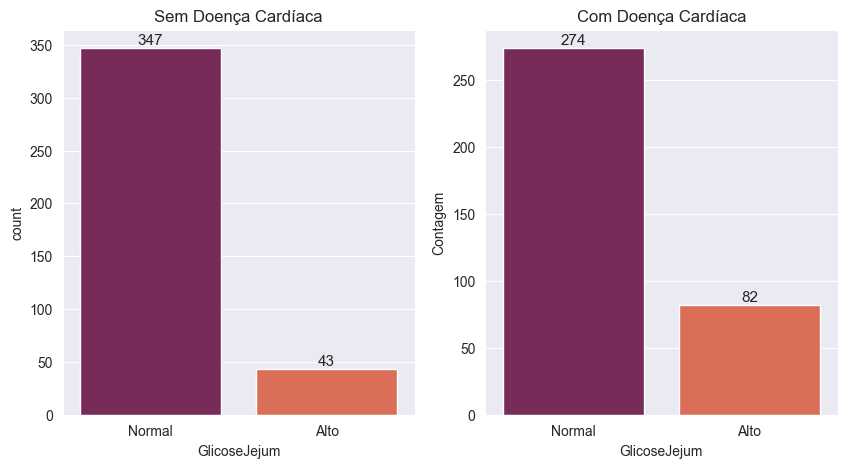

In [17]:
for coluna in colunas_barra:
    grafico_categorica(coluna)

In [18]:
def grafico_numerico(coluna):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    sns.histplot(data=df_sem, x=coluna, ax=axs[0], kde=True, bins=50, color='skyblue')
    axs[0].set_title('Sem Doença Cardíaca')

    sns.histplot(data=df_com, x=coluna, ax=axs[1], kde=True, bins=50, color='tomato')
    axs[1].set_title('Com Doença Cardíaca')

    plt.tight_layout()
    plt.show()

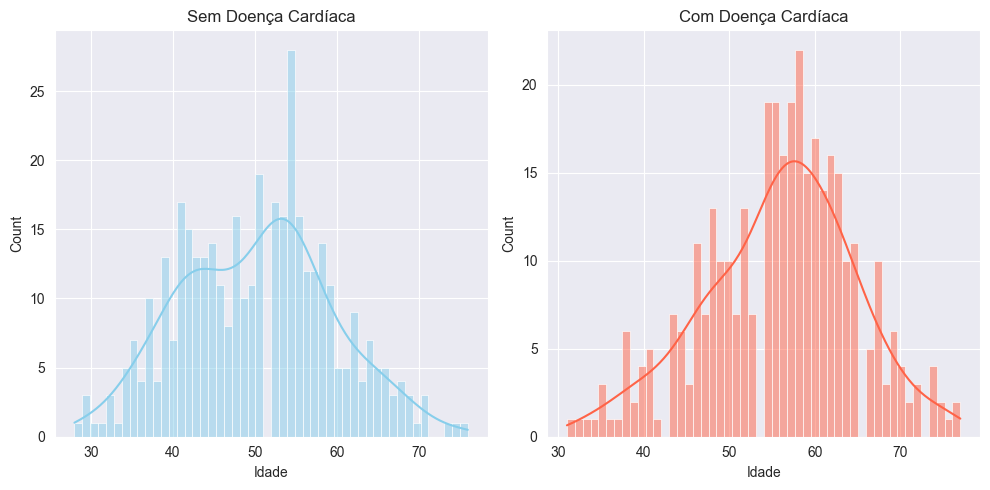

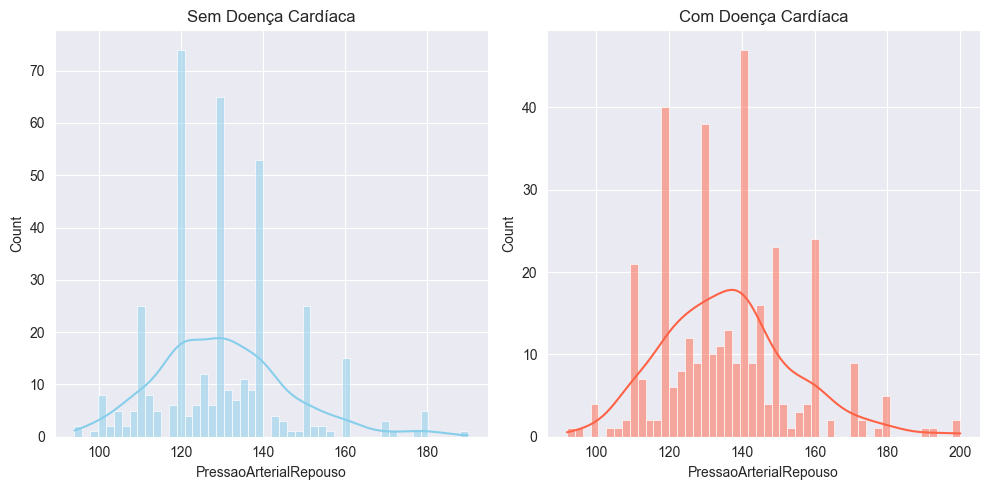

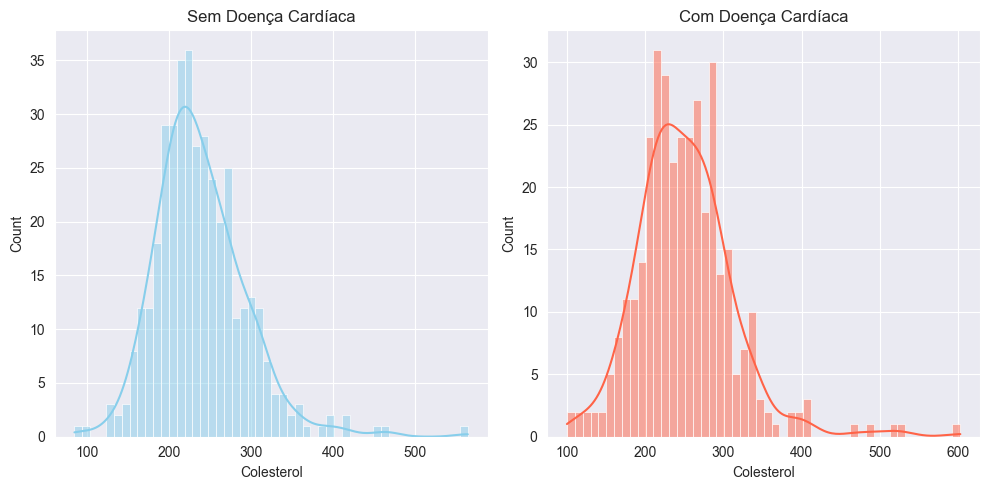

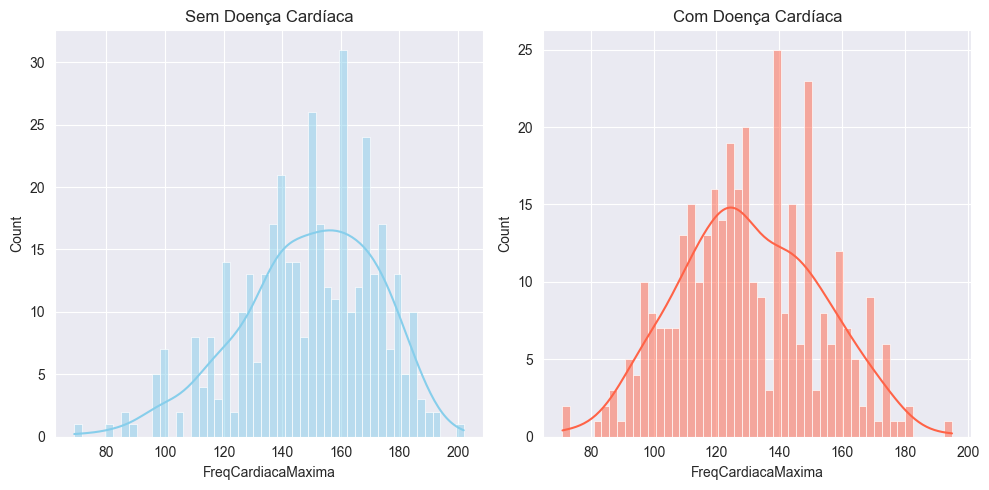

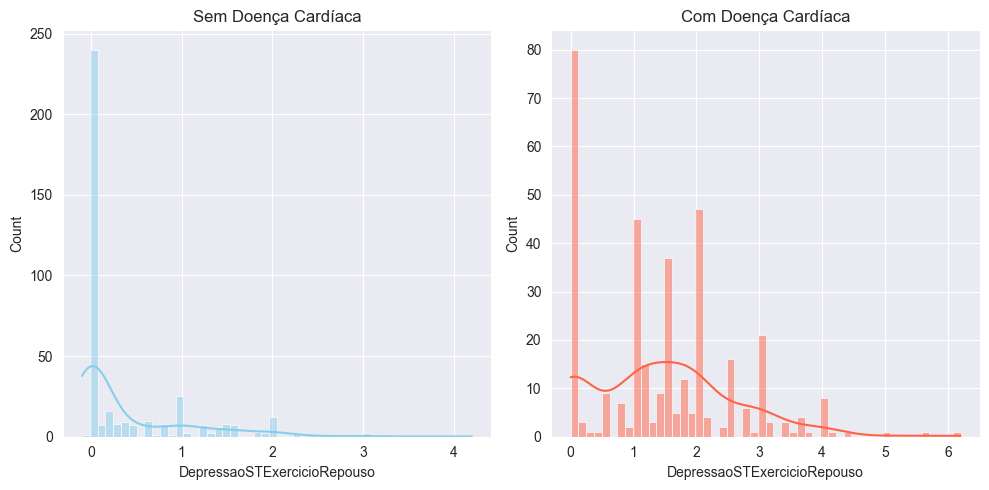

In [19]:
for coluna in colunas_hist:
    grafico_numerico(coluna)

##### Comparação entre Colunas

In [20]:
colunas_comparacao = ['Idade','PressaoArterialRepouso', 'Colesterol', 'FreqCardiacaMaxima', 'DepressaoSTExercicioRepouso']

In [21]:
def comparar_coluna(coluna, colunas_comparadas):
    fig, axs = plt.subplots(nrows=1, ncols=len(colunas_comparadas), figsize=(20, 8))

    for i, coluna_num in enumerate(colunas_comparadas):
        sns.boxplot(
            data=df,
            x=coluna,
            y=coluna_num,
            hue="DoencaCardiaca",
            palette="cubehelix",
            ax=axs[i],
        )
        axs[i].set_title(f"{coluna_num}")

    plt.tight_layout()
    plt.show()

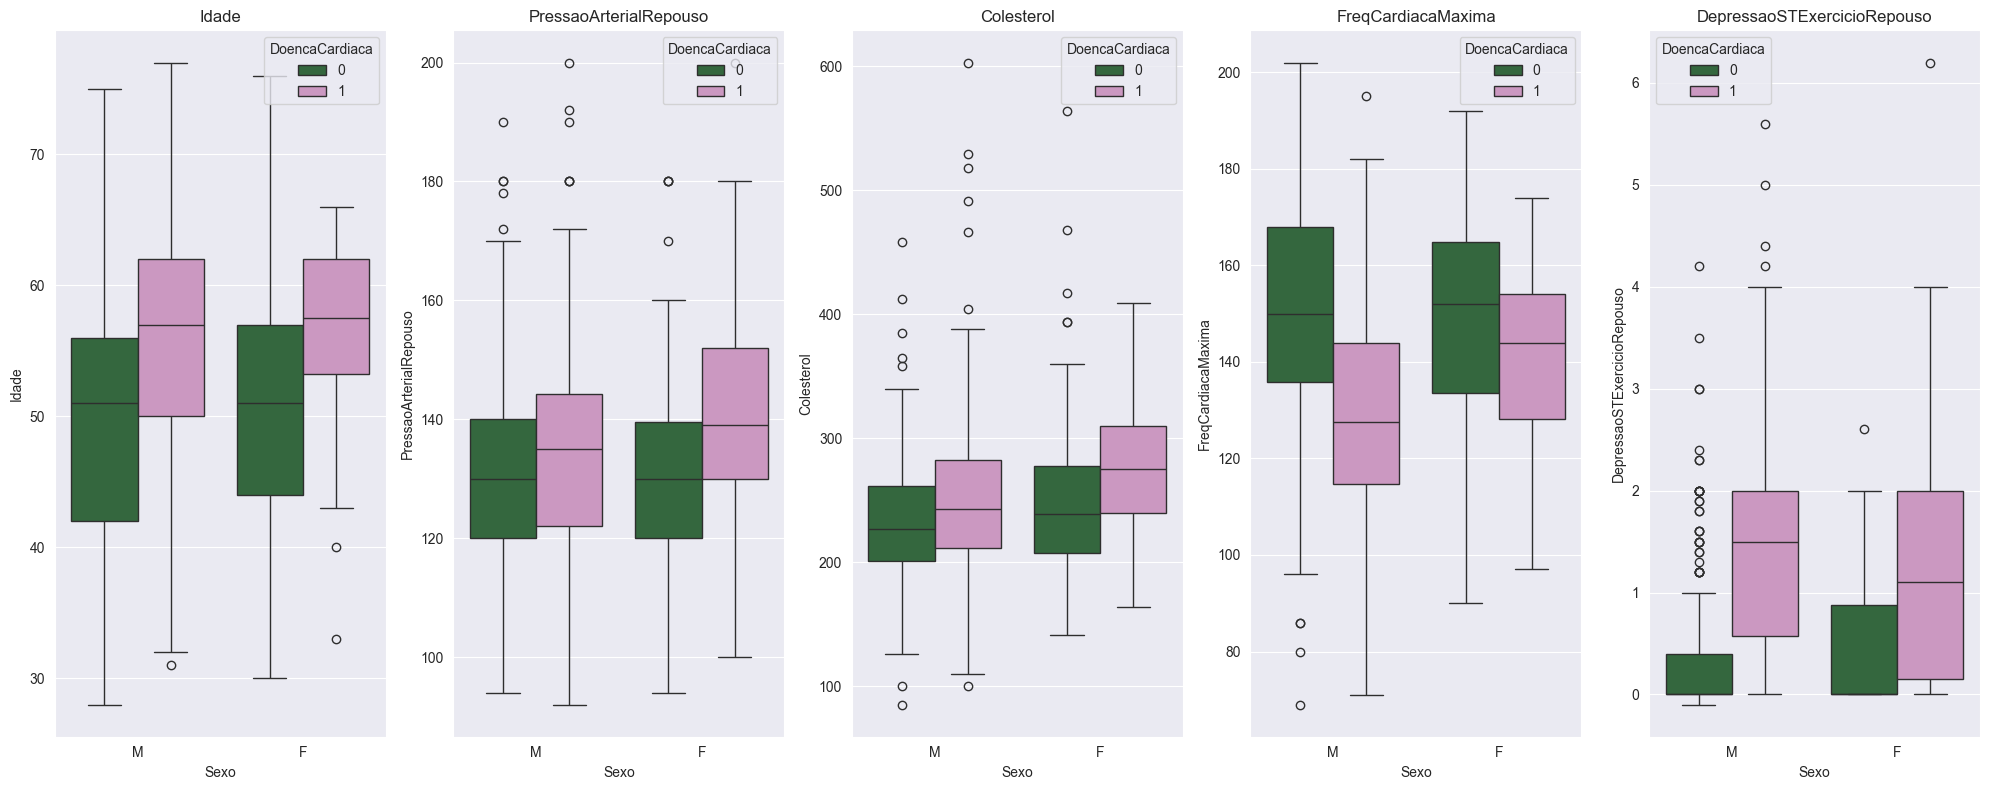

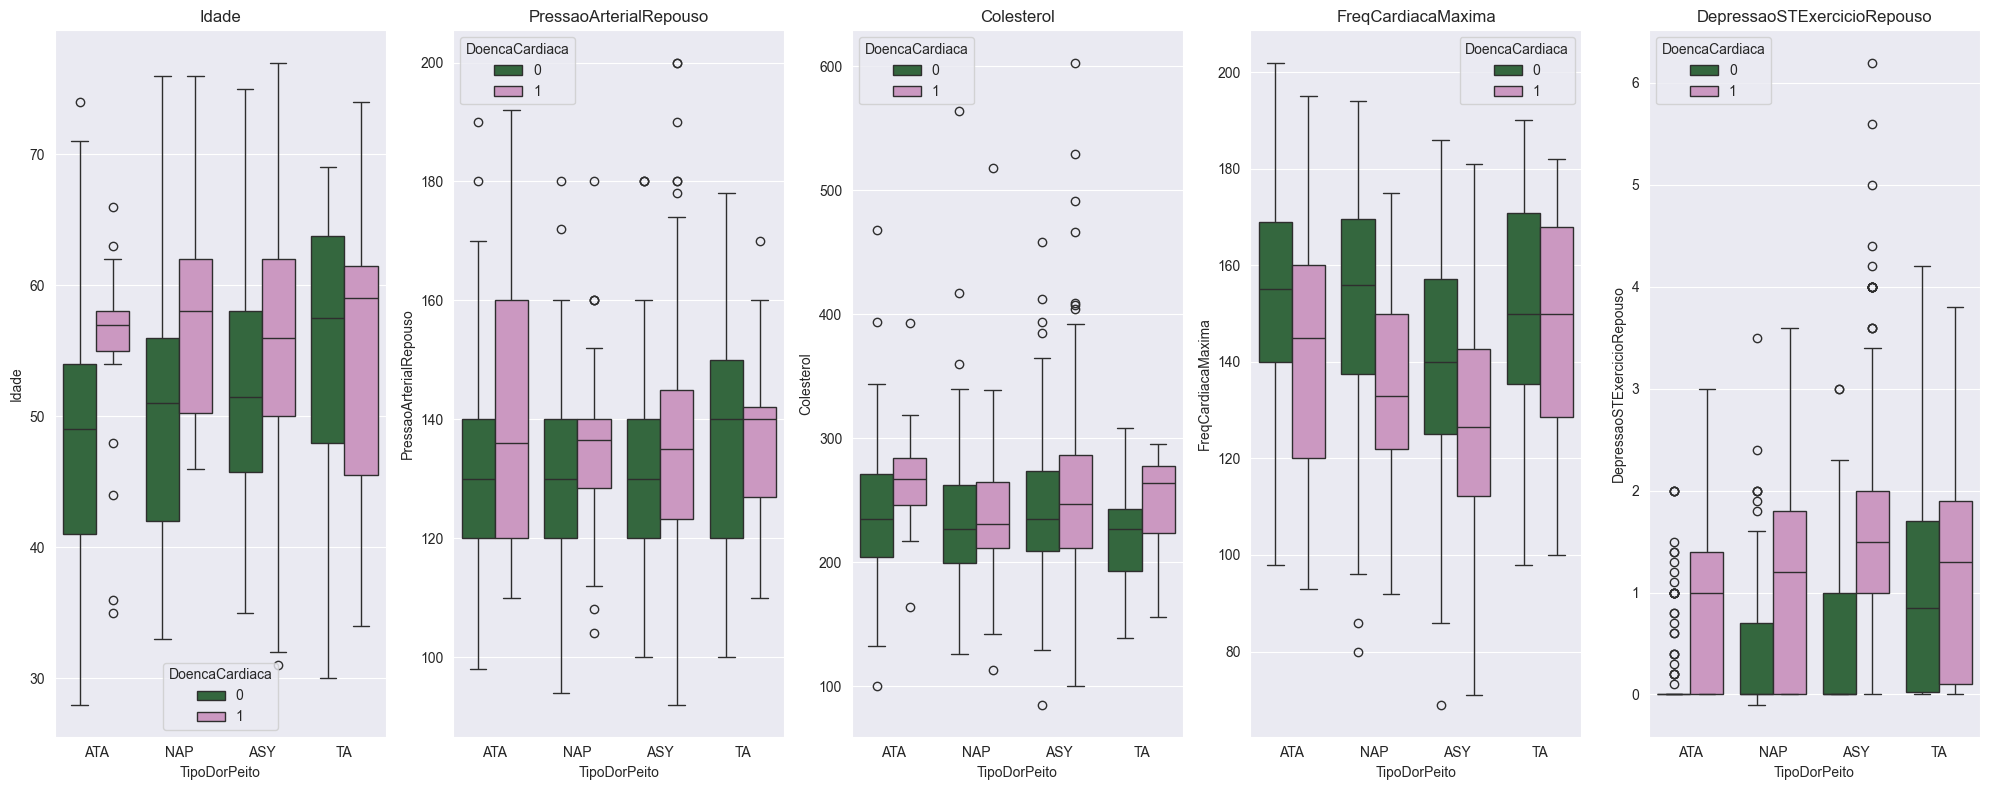

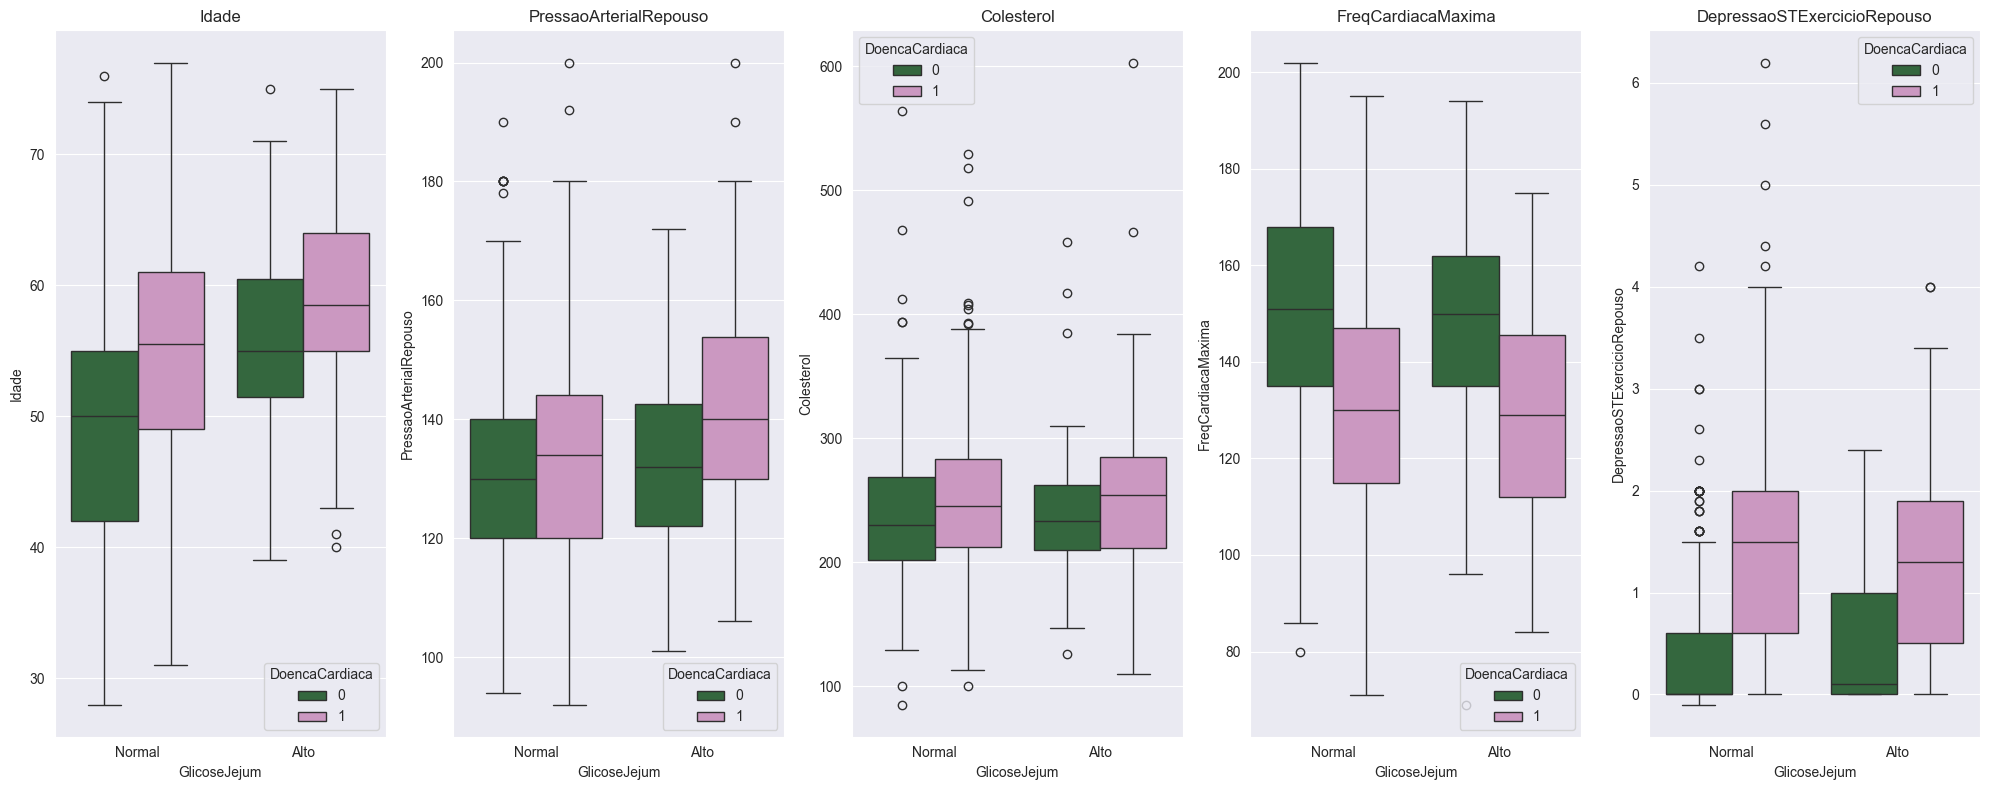

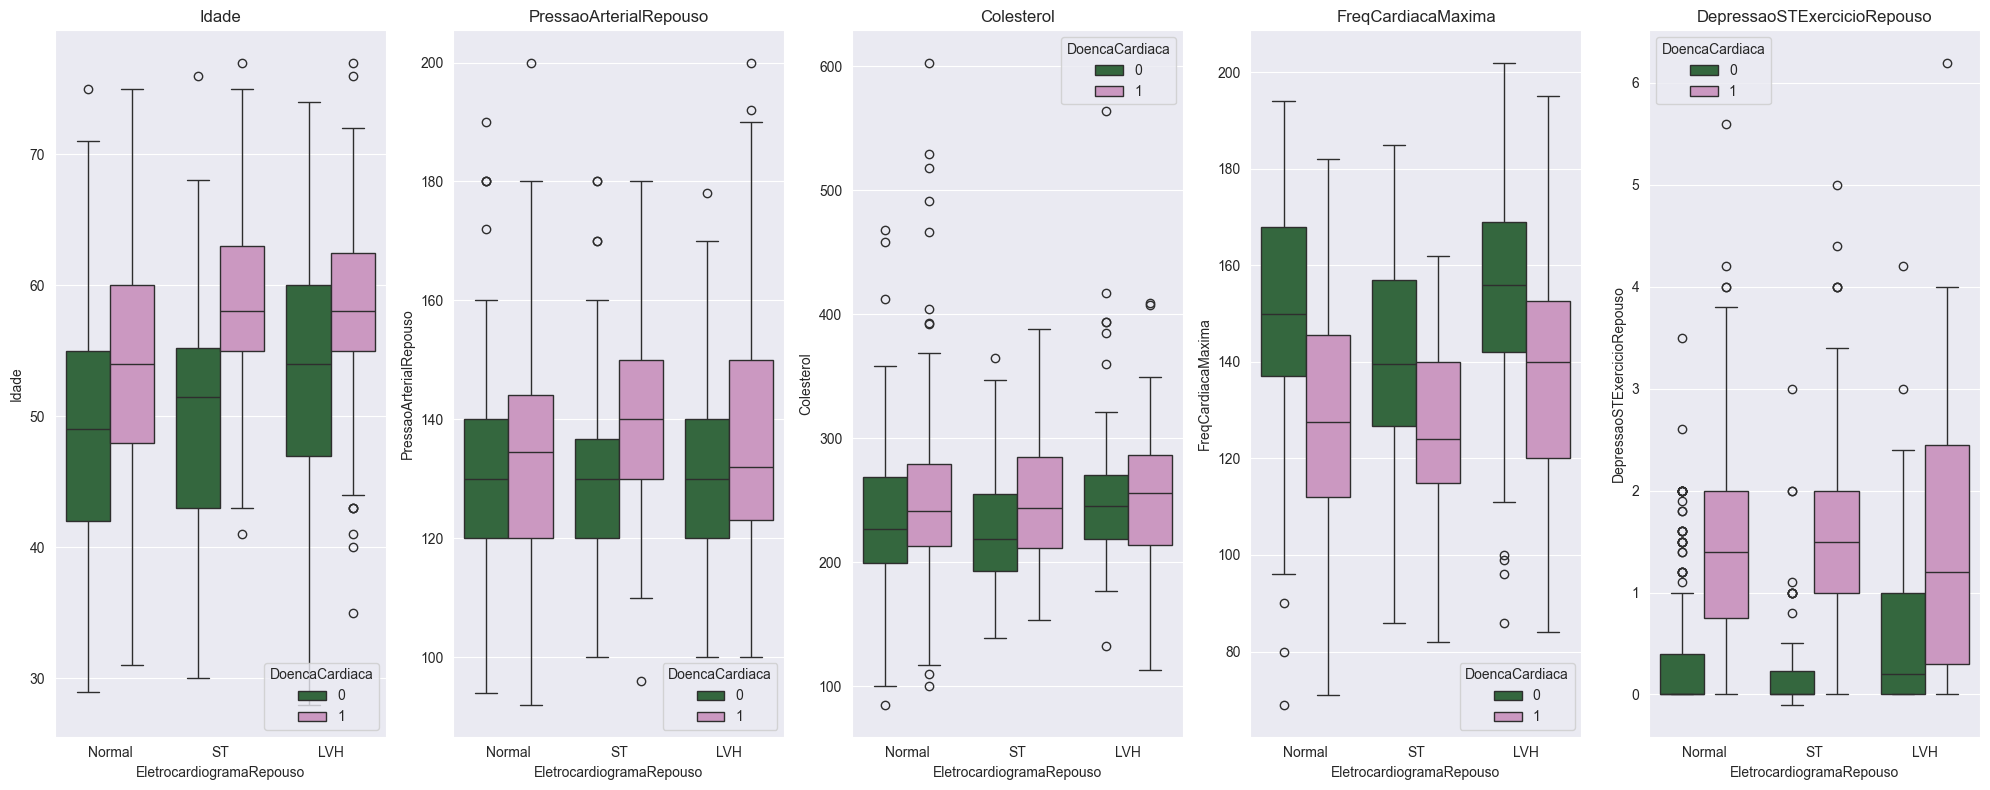

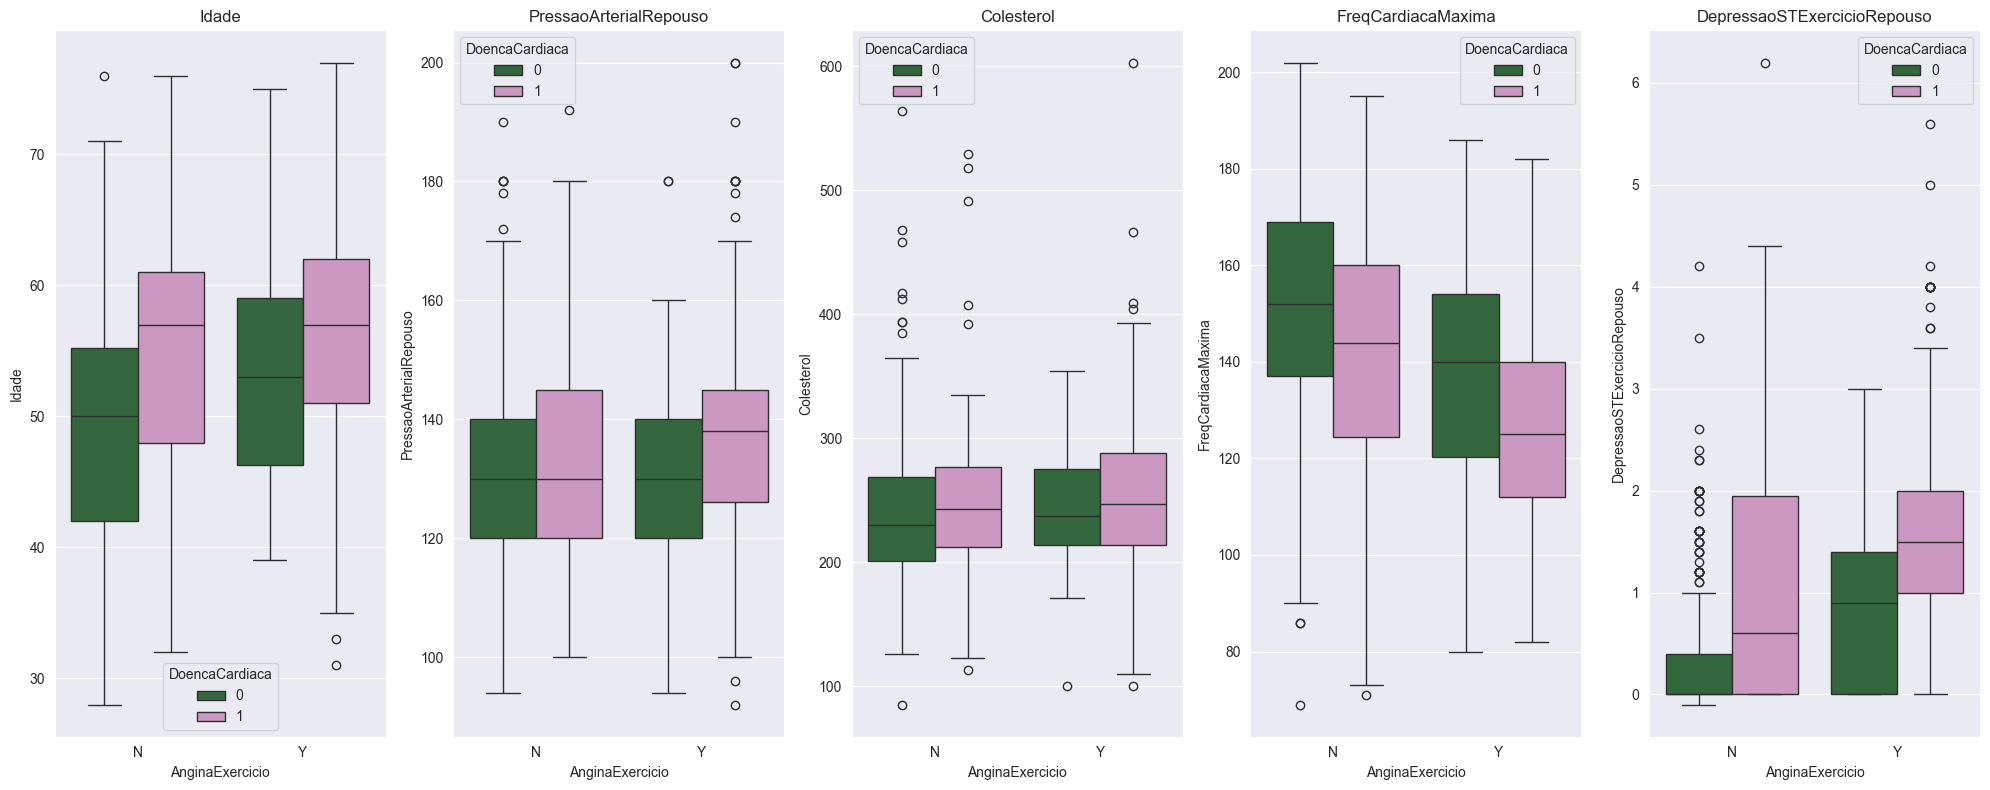

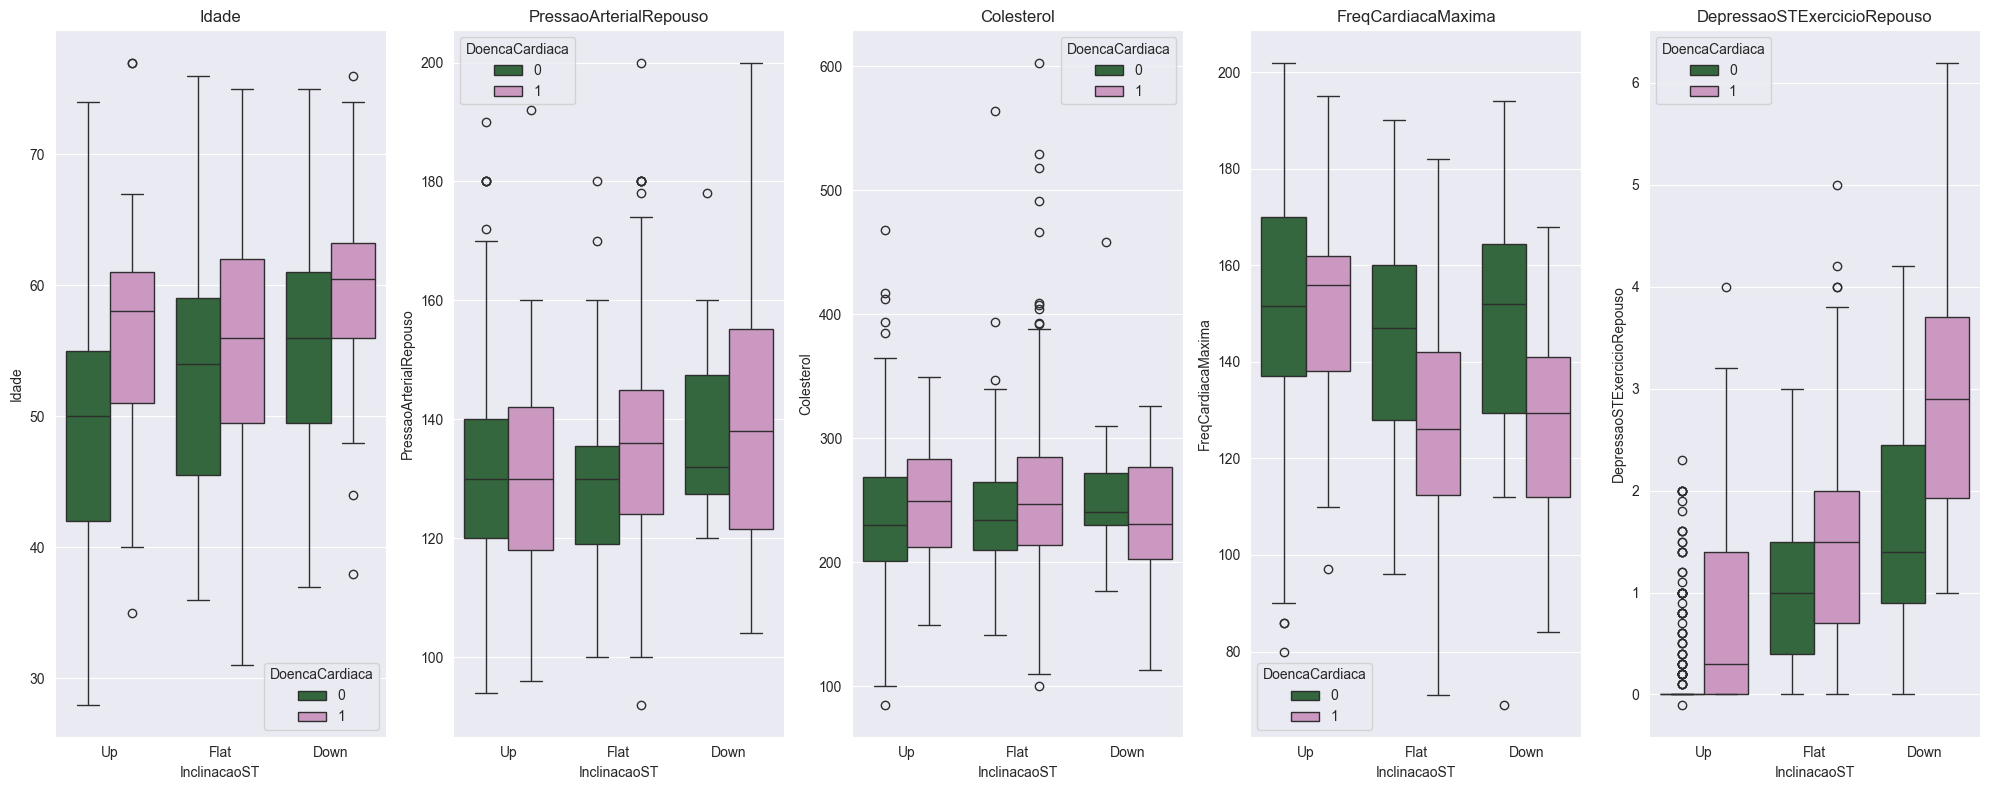

In [22]:
for coluna in colunas_categoricas:
    comparar_coluna(coluna, colunas_comparadas=colunas_comparacao)

In [23]:
def comparar_colunas_numericas(colunas):
    n_subplots = len(colunas) * (len(colunas) - 1) // 2

    fig, axs = plt.subplots(nrows=n_subplots // 2, ncols=2, figsize=(22, 18))

    k = 0

    for i in range(len(colunas)):
        for j in range(i + 1, len(colunas)):
            sns.scatterplot(
                data=df,
                x=colunas[i],
                y=colunas[j],
                hue="DoencaCardiaca",
                palette="cubehelix",
                edgecolor="black",
                ax=axs[k // 2, k % 2],
            )
            axs[k // 2, k % 2].set_title(f"{colunas[i]} vs {colunas[j]}")
            k += 1

    for i in range(n_subplots // 2):
        for j in range(2):
            if k < n_subplots:
                axs[i, j].set_visible(False)
                k += 1

    plt.tight_layout()
    plt.show()


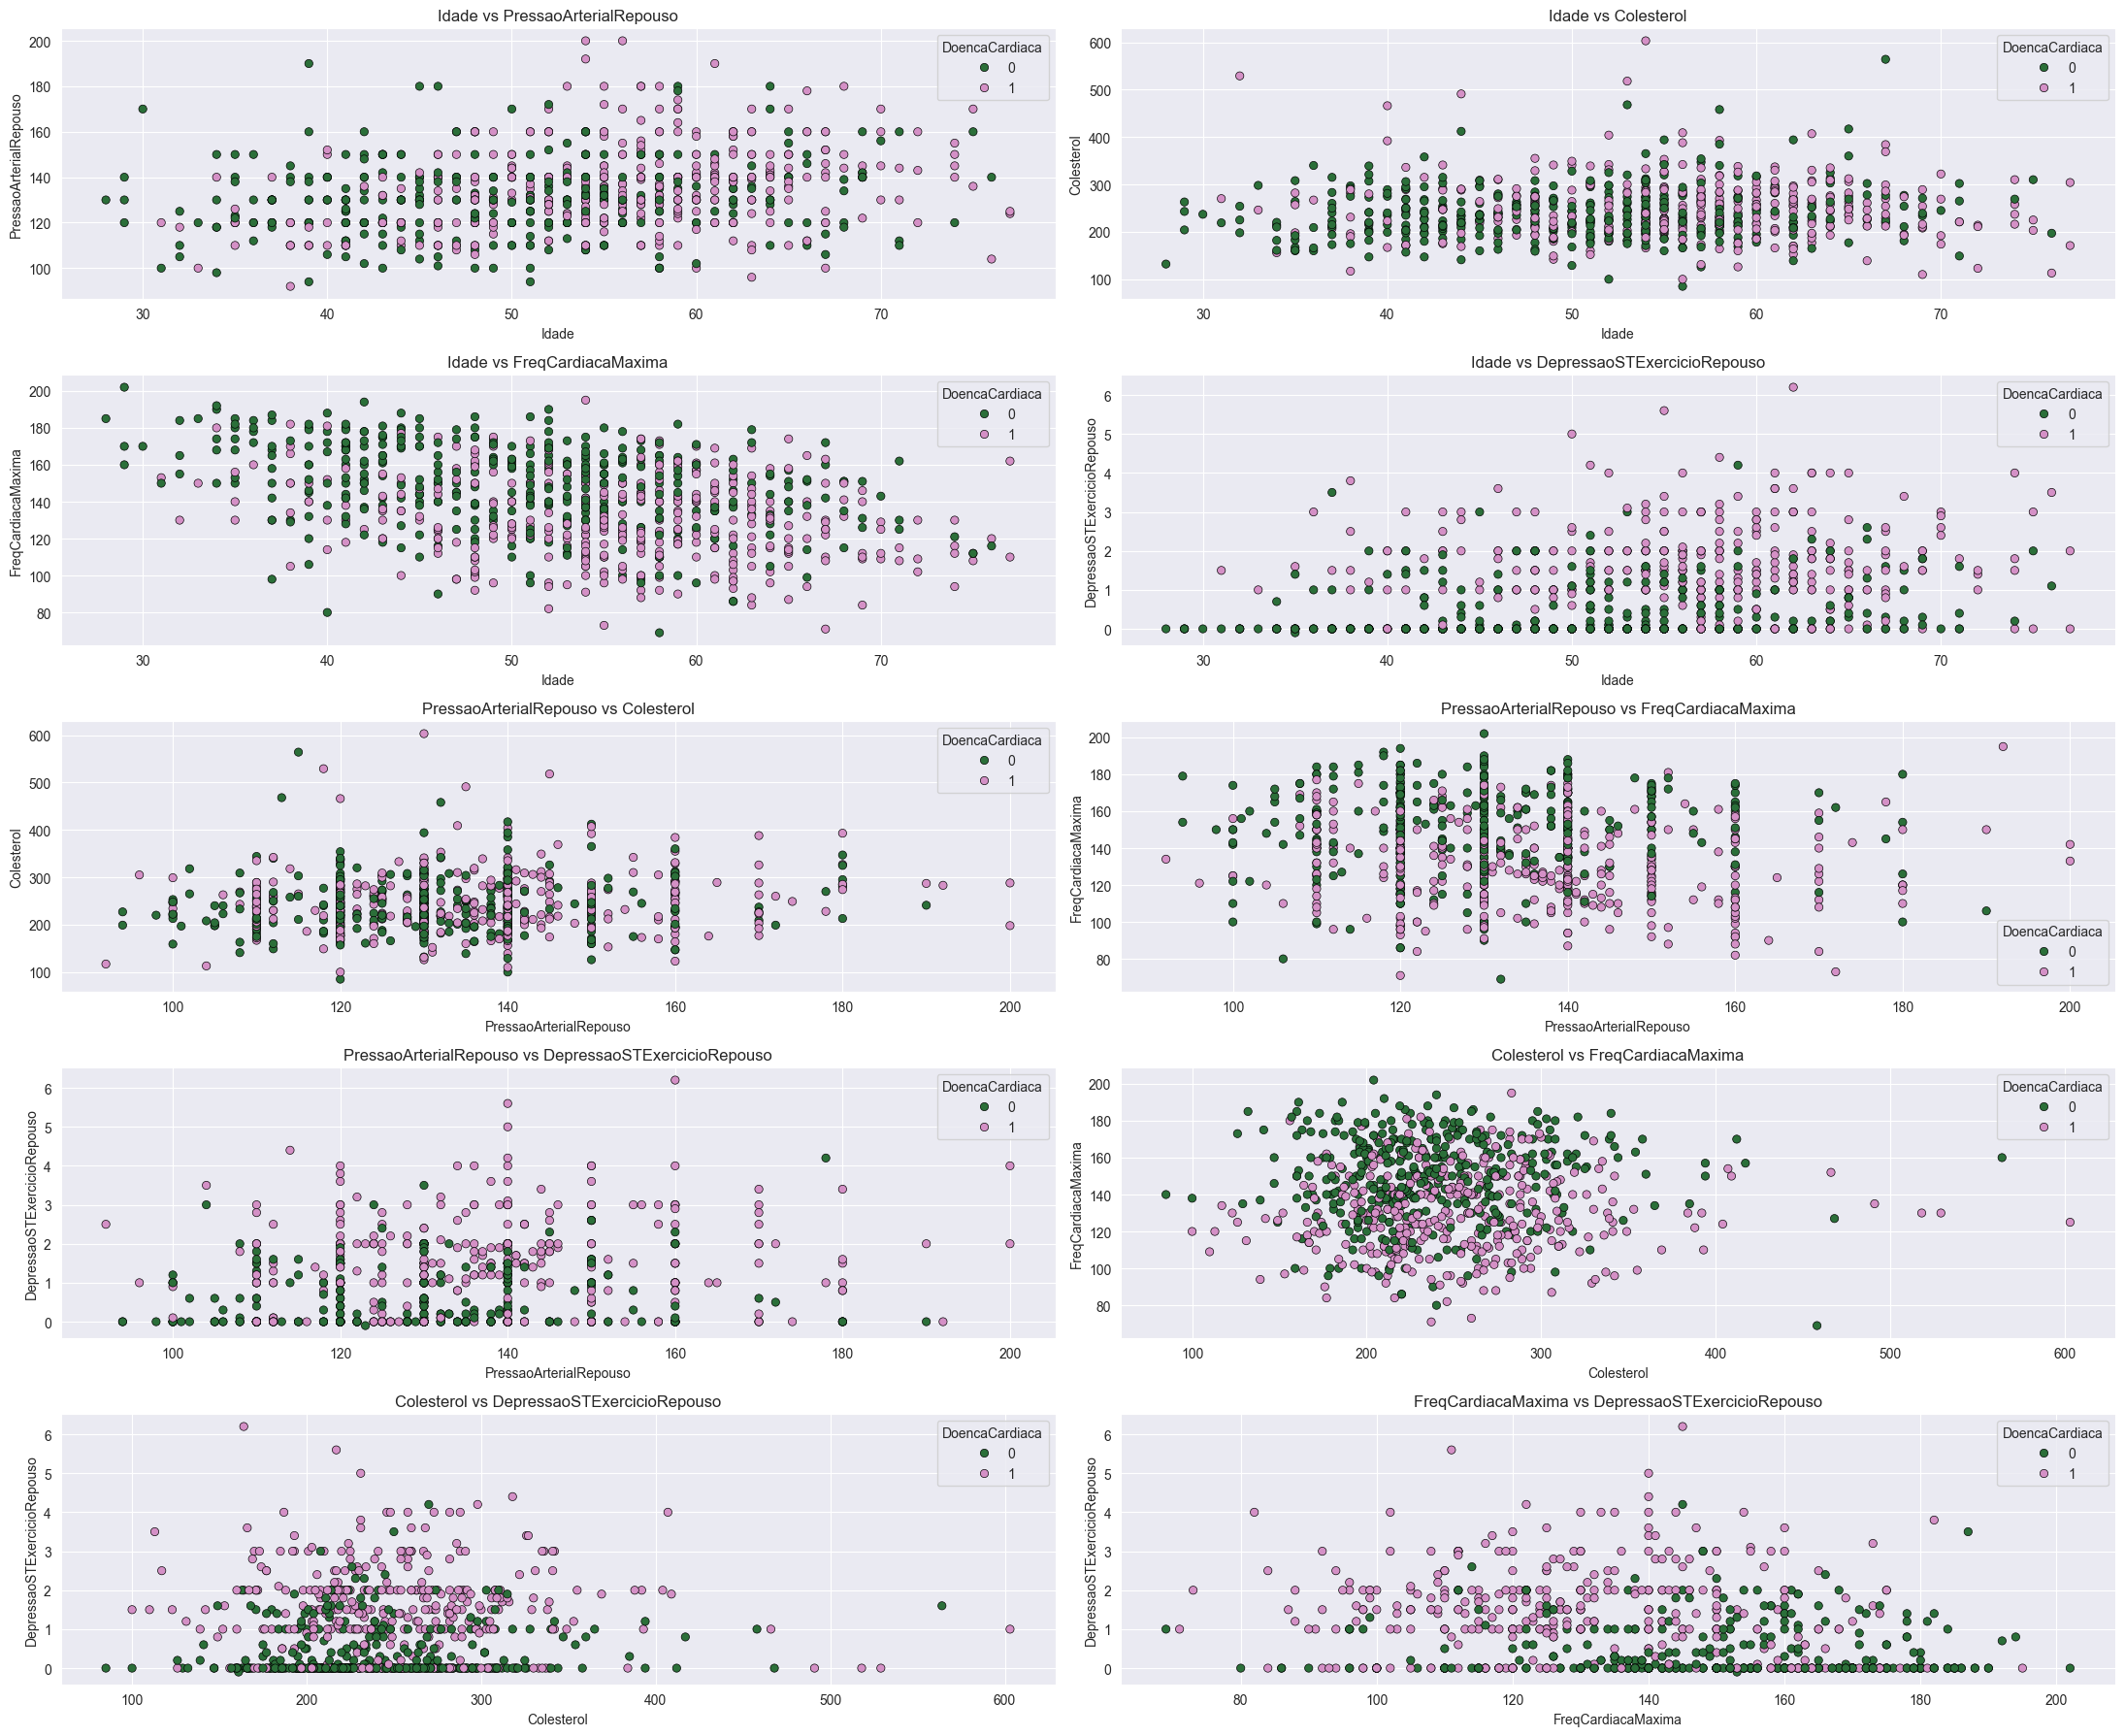

In [24]:
comparar_colunas_numericas(colunas_comparacao)